In [1]:
from google.colab import files
uploaded = files.upload()  # Choose your zip file


Saving loods.zip to loods (2).zip


In [9]:
import zipfile
import os

# Unzip
zip_path = "loods.zip"  # replace if your filename is different
extract_dir = "extracted_files"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check what files were extracted
print(os.listdir(extract_dir))



['Mask', 'metadata.csv', 'Image']


In [10]:
import pandas as pd
import os

csv_path = os.path.join("extracted_files", "metadata.csv")
df = pd.read_csv(csv_path)
df.head()


Image   Mask
0  0.jpg  0.png
1  1.jpg  1.png
2  2.jpg  2.png
3  3.jpg  3.png
4  4.jpg  4.png

In [11]:
image_folder = os.path.join("extracted_files", "Image")
mask_folder = os.path.join("extracted_files", "Mask")

# List only first 5 files
image_files = os.listdir(image_folder)[:5]
mask_files = os.listdir(mask_folder)[:5]

print("Sample Images:", image_files)
print("Sample Masks:", mask_files)


Sample Images: ['1053.jpg', '3025.jpg', '1045.jpg', '3076.jpg', '3090.jpg']
Sample Masks: ['10.png', '1017.png', '1065.png', '1085.png', '1038.png']


In [12]:
print(df.columns)  # What columns exist?
print(df.head())

Index(['Image', 'Mask'], dtype='object')
   Image   Mask
0  0.jpg  0.png
1  1.jpg  1.png
2  2.jpg  2.png
3  3.jpg  3.png
4  4.jpg  4.png


In [13]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Data types
print("\nData types:\n", df.dtypes)

# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe(include='all'))


Missing values:
 Image    0
Mask     0
dtype: int64

Data types:
 Image    object
Mask     object
dtype: object

Descriptive statistics:
           Image      Mask
count        290       290
unique       290       290
top     1087.jpg  1087.png
freq           1         1


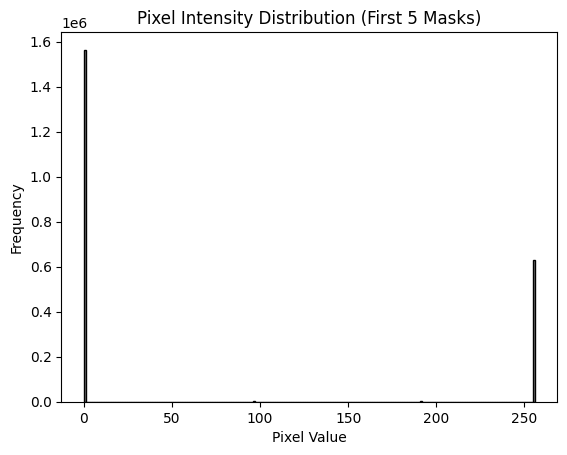

In [1]:
#pixel intensity distribution
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define mask folder path
mask_folder = os.path.join("extracted_files", "Mask")

# Get first 5 mask file names
mask_files = os.listdir(mask_folder)[:5]

pixels = []

for fname in mask_files:
    msk_path = os.path.join(mask_folder, fname)
    msk = Image.open(msk_path).convert('L')  # Grayscale
    pixels.extend(np.array(msk).flatten())

# Plot histogram
plt.hist(pixels, bins=range(0, 257), color='gray', edgecolor='black')
plt.title("Pixel Intensity Distribution (First 5 Masks)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()



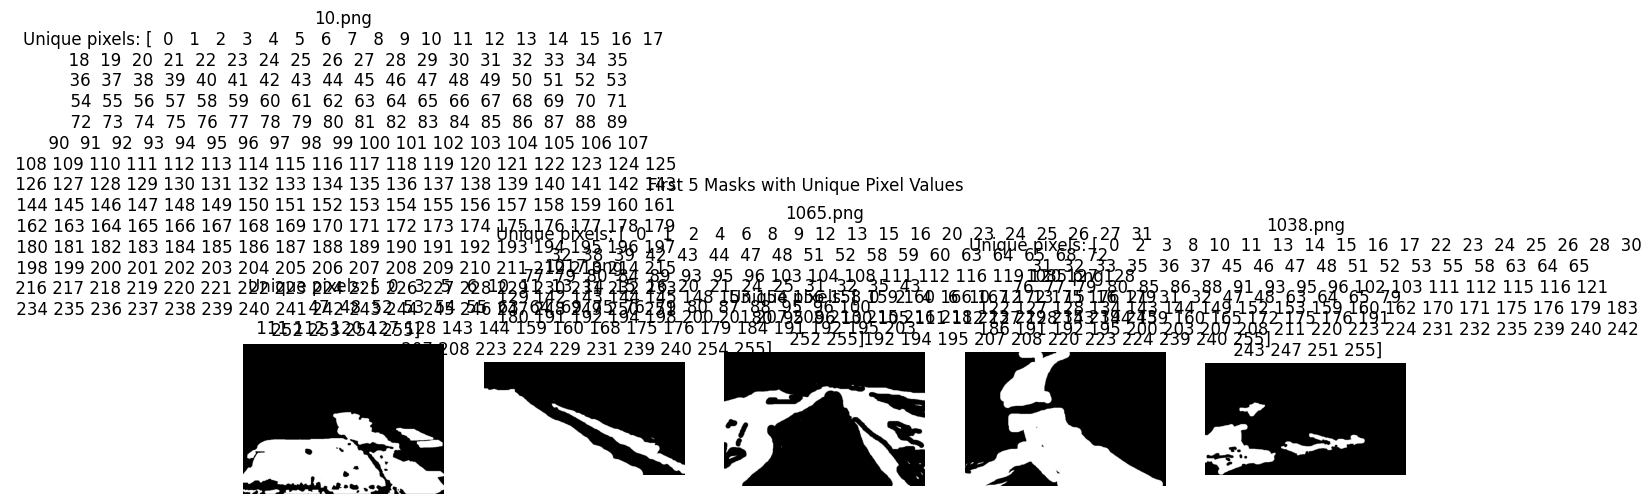

Overall unique pixel values in these 5 masks: [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9), np.uint8(10), np.uint8(11), np.uint8(12), np.uint8(13), np.uint8(14), np.uint8(15), np.uint8(16), np.uint8(17), np.uint8(18), np.uint8(19), np.uint8(20), np.uint8(21), np.uint8(22), np.uint8(23), np.uint8(24), np.uint8(25), np.uint8(26), np.uint8(27), np.uint8(28), np.uint8(29), np.uint8(30), np.uint8(31), np.uint8(32), np.uint8(33), np.uint8(34), np.uint8(35), np.uint8(36), np.uint8(37), np.uint8(38), np.uint8(39), np.uint8(40), np.uint8(41), np.uint8(42), np.uint8(43), np.uint8(44), np.uint8(45), np.uint8(46), np.uint8(47), np.uint8(48), np.uint8(49), np.uint8(50), np.uint8(51), np.uint8(52), np.uint8(53), np.uint8(54), np.uint8(55), np.uint8(56), np.uint8(57), np.uint8(58), np.uint8(59), np.uint8(60), np.uint8(61), np.uint8(62), np.uint8(63), np.uint8(64), np.uint8(65), np.uint8(66), np.uint8(67), np.uint8(68

In [2]:
#printing unique pixel values in first 5 masks
#visualizing 5 masks side by side with unique pixel values
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

mask_folder = os.path.join("extracted_files", "Mask")
mask_files = os.listdir(mask_folder)[:5]

unique_pixel_values = set()

plt.figure(figsize=(15, 5))

for i, fname in enumerate(mask_files):
    mask_path = os.path.join(mask_folder, fname)
    mask = Image.open(mask_path).convert('L')
    mask_np = np.array(mask)

    # Collect unique pixel values
    unique_pixel_values.update(np.unique(mask_np))

    # Plot mask
    plt.subplot(1, 5, i + 1)
    plt.imshow(mask_np, cmap='gray')
    plt.title(f"{fname}\nUnique pixels: {np.unique(mask_np)}")
    plt.axis('off')

plt.suptitle("First 5 Masks with Unique Pixel Values")
plt.show()

print("Overall unique pixel values in these 5 masks:", sorted(unique_pixel_values))


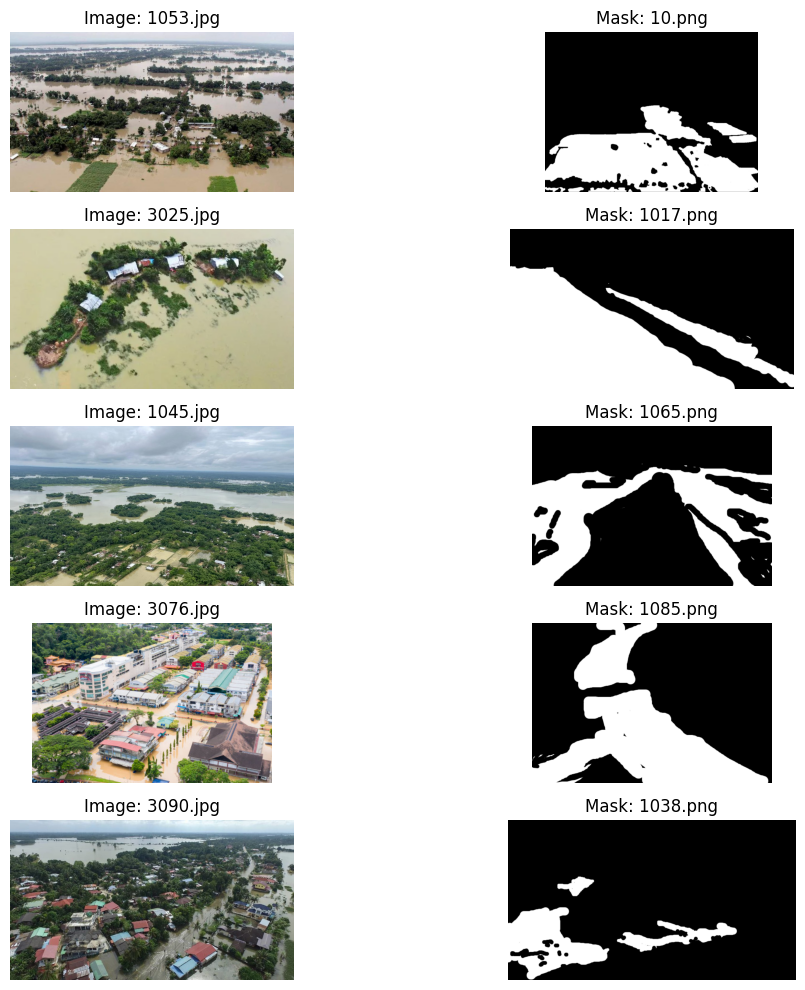

In [3]:
#visualize image-mask pairs side by side
import matplotlib.pyplot as plt
from PIL import Image
import os

image_folder = os.path.join("extracted_files", "Image")
mask_folder = os.path.join("extracted_files", "Mask")

image_files = os.listdir(image_folder)[:5]
mask_files = os.listdir(mask_folder)[:5]

plt.figure(figsize=(12, 10))

for i in range(5):
    # Load image and mask
    img_path = os.path.join(image_folder, image_files[i])
    mask_path = os.path.join(mask_folder, mask_files[i])

    img = Image.open(img_path)
    mask = Image.open(mask_path).convert('L')

    # Show image
    plt.subplot(5, 2, 2*i + 1)
    plt.imshow(img)
    plt.title(f"Image: {image_files[i]}")
    plt.axis('off')

    # Show corresponding mask
    plt.subplot(5, 2, 2*i + 2)
    plt.imshow(mask, cmap='gray')
    plt.title(f"Mask: {mask_files[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
#pytorch dataset for image-mask pairs
import torch
from torch.utils.data import Dataset
from PIL import Image
import os
import pandas as pd
import torchvision.transforms as transforms

class SegmentationDatasetWithCSV(Dataset):
    def __init__(self, csv_file, image_dir, mask_dir, transform=None, mask_transform=None):
        self.df = pd.read_csv(csv_file)
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.mask_transform = mask_transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        image_name = row['Image']
        mask_name = row['Mask']

        img_path = os.path.join(self.image_dir, image_name)
        mask_path = os.path.join(self.mask_dir, mask_name)

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")

        if self.transform:
            image = self.transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        return image, mask

# Define transforms (resize + to tensor)
transform_img = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

transform_mask = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # this will give a float tensor in [0,1]
])

# Paths
csv_path = 'extracted_files/metadata.csv'
image_folder = 'extracted_files/Image'
mask_folder = 'extracted_files/Mask'

dataset = SegmentationDatasetWithCSV(csv_path, image_folder, mask_folder, transform=transform_img, mask_transform=transform_mask)

from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Check one batch
images, masks = next(iter(dataloader))
print(images.shape)  # e.g. torch.Size([4, 3, 256, 256])
print(masks.shape)   # e.g. torch.Size([4, 1, 256, 256])

#uses your csv to get filenames of images and masks
#loads them from folders
#Aplies resizing and converts to tensors
#loads batches with dataloader



torch.Size([4, 3, 256, 256])
torch.Size([4, 1, 256, 256])


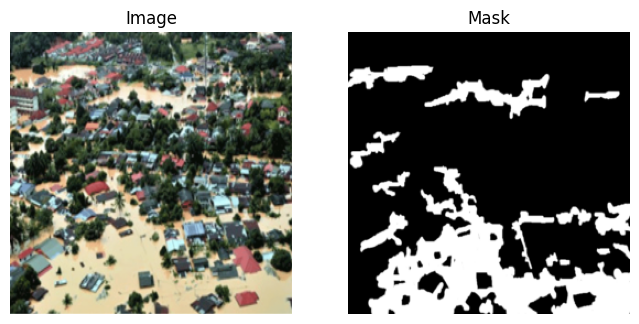

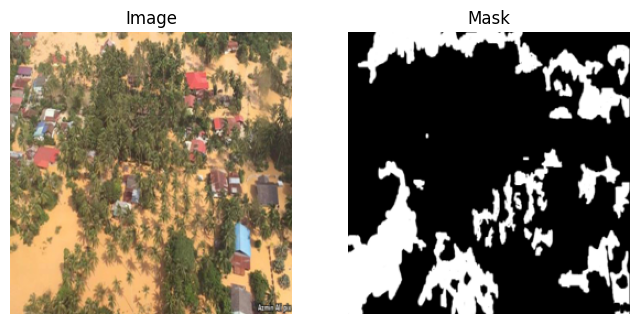

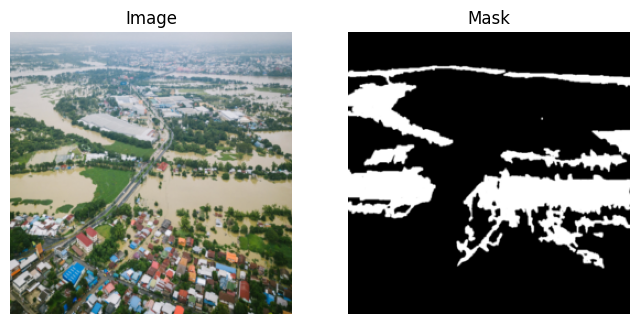

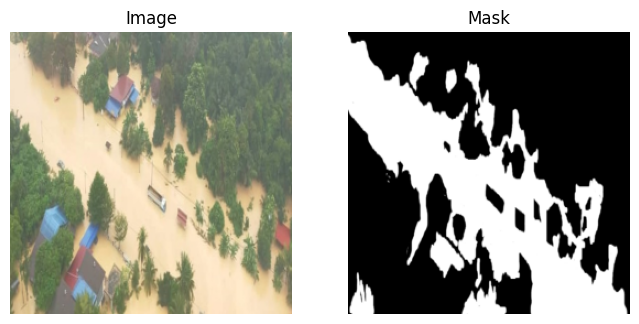

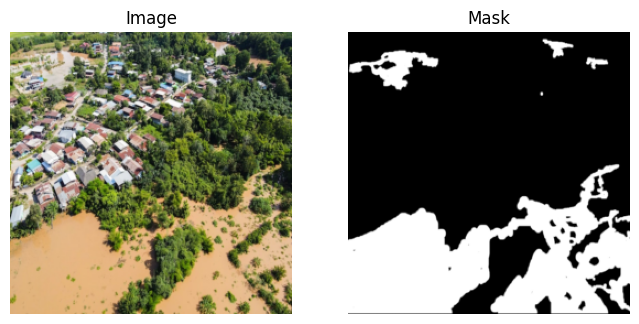

In [6]:
#visualizing few image-mask pairs from your dataset
import matplotlib.pyplot as plt

def show_samples(dataset, num_samples=5):
    for i in range(num_samples):
        image, mask = dataset[i]

        # Convert tensors to numpy arrays for plotting
        img_np = image.permute(1, 2, 0).numpy()  # CHW to HWC for RGB
        mask_np = mask.squeeze().numpy()          # remove channel dim from mask

        fig, axs = plt.subplots(1, 2, figsize=(8, 4))
        axs[0].imshow(img_np)
        axs[0].set_title("Image")
        axs[0].axis('off')

        axs[1].imshow(mask_np, cmap='gray')
        axs[1].set_title("Mask")
        axs[1].axis('off')

        plt.show()

# Call the function to display 5 samples
show_samples(dataset, num_samples=5)

#loops through first num_samples items in your dataset
#converts tensors back to numpy arrays for imshow
#shows side-by-side image and mask for visual checking


In [7]:
#basic training loop skeleton
import torch
import torch.nn as nn
import torch.optim as optim

# Example model (replace with your own or a library model)
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(32, 16, 3, padding=1), nn.ReLU(),
            nn.Conv2d(16, 1, 1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN().to(device)

criterion = nn.BCEWithLogitsLoss()  # For binary segmentation
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in dataloader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        # Make sure outputs and masks have the same shape:
        outputs = outputs.squeeze(1)  # remove channel dim if needed
        masks = masks.squeeze(1)      # remove channel dim

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}")


Epoch [1/5], Loss: 0.6124
Epoch [2/5], Loss: 0.5574
Epoch [3/5], Loss: 0.5318
Epoch [4/5], Loss: 0.5100
Epoch [5/5], Loss: 0.4834


From above analysis the loss is steadily going on so our model is learning

In [8]:
# Split your dataset into training and validation sets
from torch.utils.data import random_split

val_size = int(0.2 * len(dataset))
train_size = len(dataset) - val_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)


In [11]:
# Define dice coefficient function
def dice_coeff(pred, target, smooth=1e-6):
    pred = torch.sigmoid(pred)
    pred = (pred > 0.5).float()

    # Add channel dim if missing
    if pred.dim() == 3:
        pred = pred.unsqueeze(1)
    if target.dim() == 3:
        target = target.unsqueeze(1)

    intersection = (pred * target).sum(dim=(2,3))
    union = pred.sum(dim=(2,3)) + target.sum(dim=(2,3))

    dice = (2 * intersection + smooth) / (union + smooth)
    return dice.mean().item()



In [12]:
# Training and validation loop with dice metric
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images).squeeze(1)
        loss = criterion(outputs, masks.squeeze(1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    val_dice = 0
    with torch.no_grad():
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images).squeeze(1)
            loss = criterion(outputs, masks.squeeze(1))
            val_loss += loss.item()
            val_dice += dice_coeff(outputs, masks)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss/len(train_loader):.4f} | "
          f"Val Loss: {val_loss/len(val_loader):.4f} | "
          f"Val Dice: {val_dice/len(val_loader):.4f}")


Epoch 1/5 | Train Loss: 0.5040 | Val Loss: 0.4758 | Val Dice: 0.5947
Epoch 2/5 | Train Loss: 0.4821 | Val Loss: 0.4469 | Val Dice: 0.6754
Epoch 3/5 | Train Loss: 0.4719 | Val Loss: 0.4395 | Val Dice: 0.6695
Epoch 4/5 | Train Loss: 0.4802 | Val Loss: 0.4452 | Val Dice: 0.6781
Epoch 5/5 | Train Loss: 0.4610 | Val Loss: 0.4500 | Val Dice: 0.6474


The Output means your model is training and validating successfully.


*   Loss is decreasing → your model is learning.
*   Dice Coefficient is increasing (a bit unstable,
  but that's normal for small datasets) → segmentation quality is improving.
* Validation Dice ≈ 0.65–0.68 → your model has a decent start for binary segmentation.






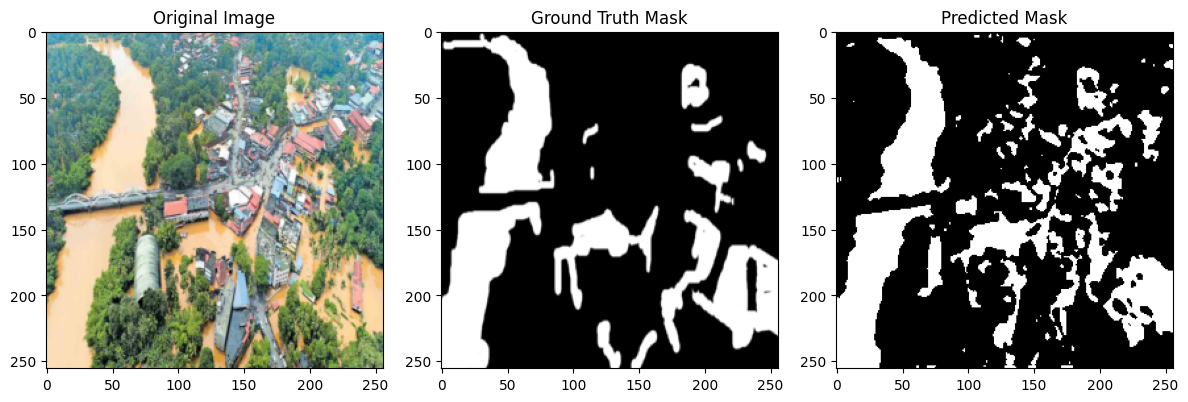

In [19]:
#Visualizing Predictions
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn.functional as F

# Set model to eval mode
model.eval()

# Get image and mask tensors from dataset
image_tensor, mask_tensor = val_dataset[0]
image = transforms.ToPILImage()(image_tensor.cpu())
mask = transforms.ToPILImage()(mask_tensor.cpu().squeeze(0))

# Move image tensor to device and add batch dimension
image_tensor = image_tensor.unsqueeze(0).to(device)

# Predict
with torch.no_grad():
    output = model(image_tensor)
    pred_mask = torch.sigmoid(output).squeeze().cpu().numpy()
    pred_mask = (pred_mask > 0.5).astype('uint8')

# Plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(pred_mask, cmap='gray')
plt.title("Predicted Mask")

plt.tight_layout()
plt.show()



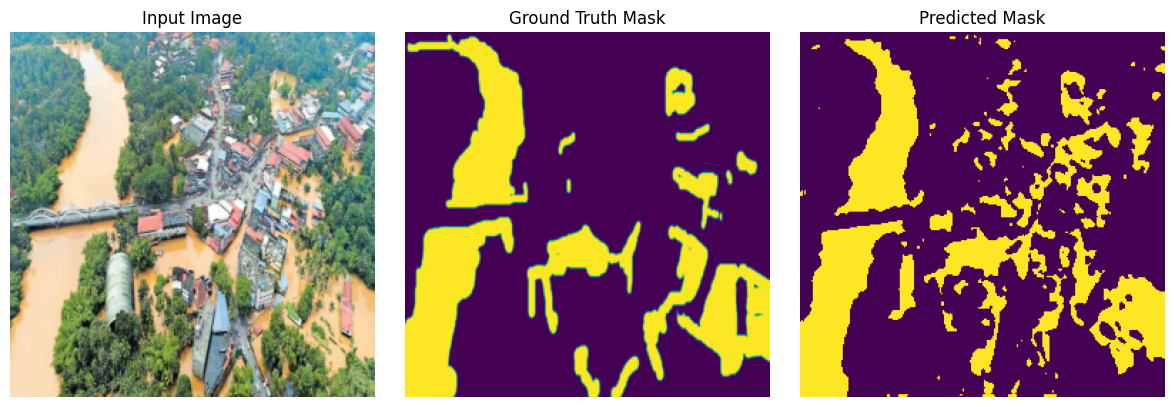

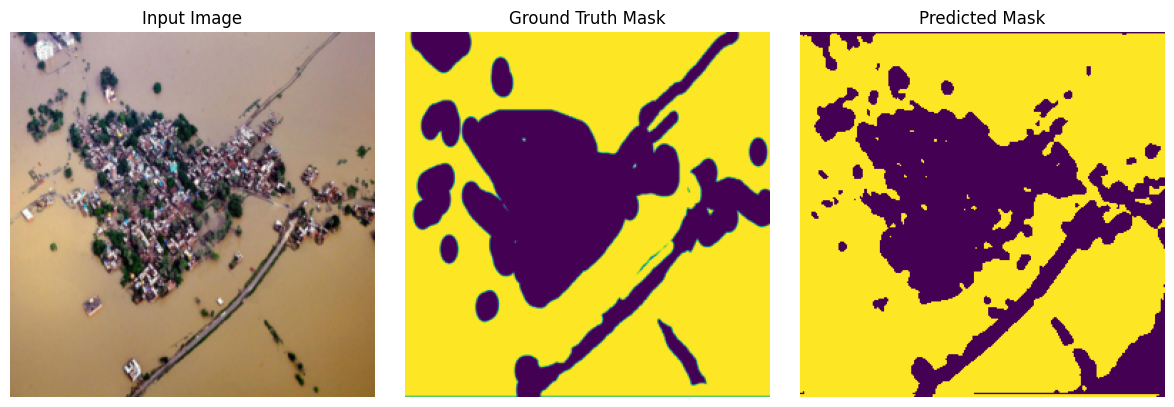

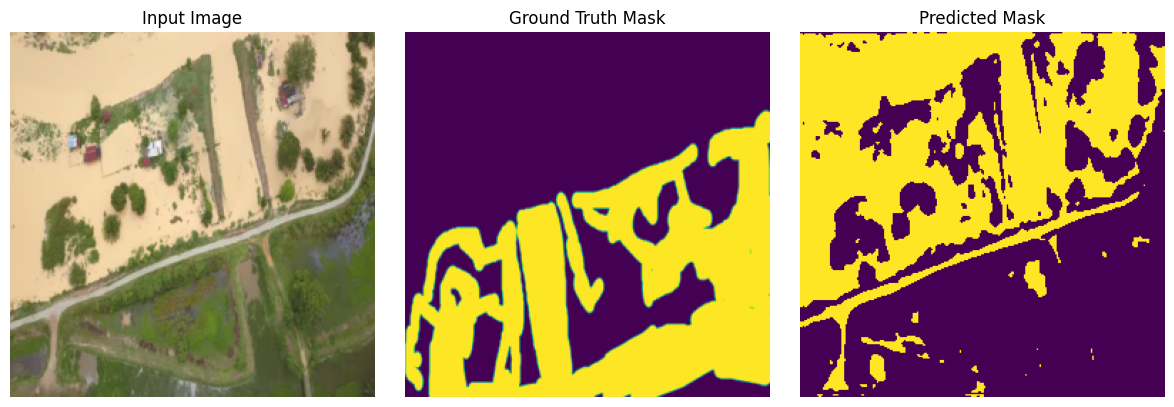

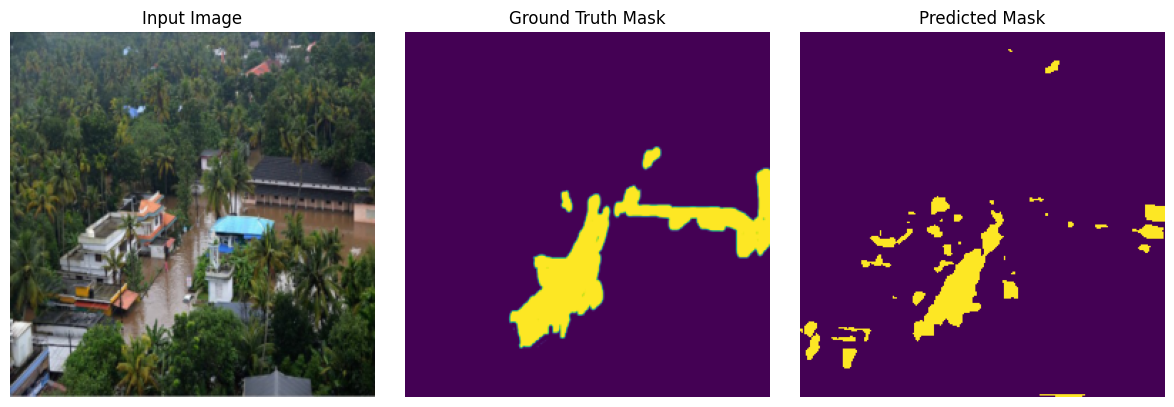

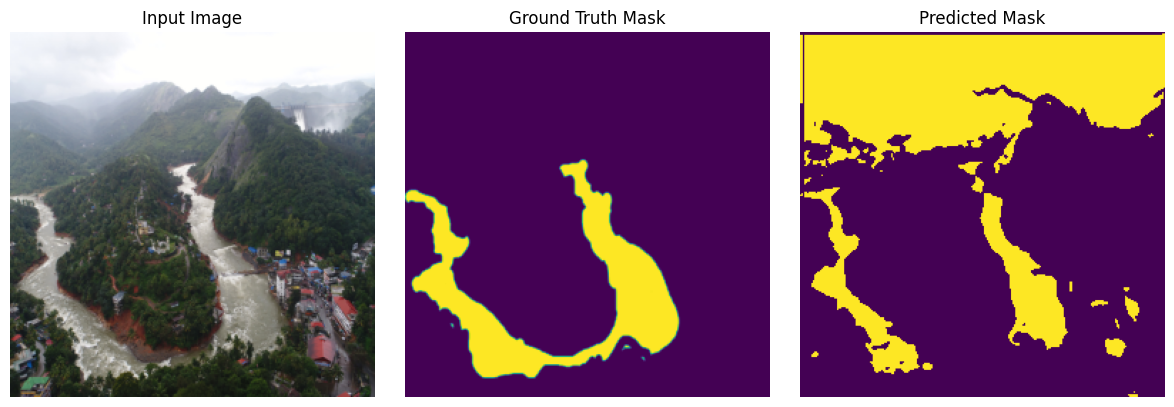

In [21]:
#visualizing model prediction on multiple samples
import matplotlib.pyplot as plt
import torch
from torchvision.transforms.functional import to_pil_image

model.eval()

def show_predictions(num_samples=5):
    model.eval()
    samples_shown = 0

    with torch.no_grad():
        for images, masks in val_loader:
            outputs = model(images.to(device))
            preds = torch.sigmoid(outputs)
            preds = (preds > 0.5).float()

            for i in range(images.size(0)):
                if samples_shown >= num_samples:
                    return

                fig, axs = plt.subplots(1, 3, figsize=(12, 4))
                axs[0].imshow(to_pil_image(images[i].cpu()))
                axs[0].set_title("Input Image")
                axs[1].imshow(to_pil_image(masks[i].cpu()))
                axs[1].set_title("Ground Truth Mask")
                axs[2].imshow(to_pil_image(preds[i].cpu()))
                axs[2].set_title("Predicted Mask")

                for ax in axs:
                    ax.axis('off')
                plt.tight_layout()
                plt.show()

                samples_shown += 1

show_predictions(num_samples=5)


In [17]:
# Evaluate model with IoU and Pixel Accuracy
def evaluate_model(loader, model, threshold=0.5):
    model.eval()
    iou_scores = []
    pixel_accuracies = []

    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            masks = masks.to(device)

            outputs = model(images)
            preds = torch.sigmoid(outputs) > threshold

            for pred, true_mask in zip(preds, masks):
                pred = pred.squeeze(0).bool()
                true_mask = true_mask.squeeze(0).bool()

                intersection = (pred & true_mask).float().sum()
                union = (pred | true_mask).float().sum()
                iou = (intersection + 1e-6) / (union + 1e-6)
                iou_scores.append(iou.item())

                pixel_accuracy = (pred == true_mask).float().mean()
                pixel_accuracies.append(pixel_accuracy.item())

    avg_iou = sum(iou_scores) / len(iou_scores)
    avg_accuracy = sum(pixel_accuracies) / len(pixel_accuracies)

    print(f"Avg IoU: {avg_iou:.4f}")
    print(f"Avg Pixel Accuracy: {avg_accuracy:.4f}")

# Run evaluation
evaluate_model(val_loader, model)



Avg IoU: 0.5027
Avg Pixel Accuracy: 0.7640


These metrics help measure how closely your predicted masks match the ground truth masks:

IoU (Intersection over Union): Measures overlap between prediction and ground truth.

Pixel Accuracy: Fraction of correctly predicted pixels.



*   Average IoU (Intersection over Union): 0.5027 — your model is capturing about 50% of the overlap between predicted and actual mask areas.
*   Average Pixel Accuracy: 0.7640 — about 76% of the pixels were predicted correctly across your validation set.




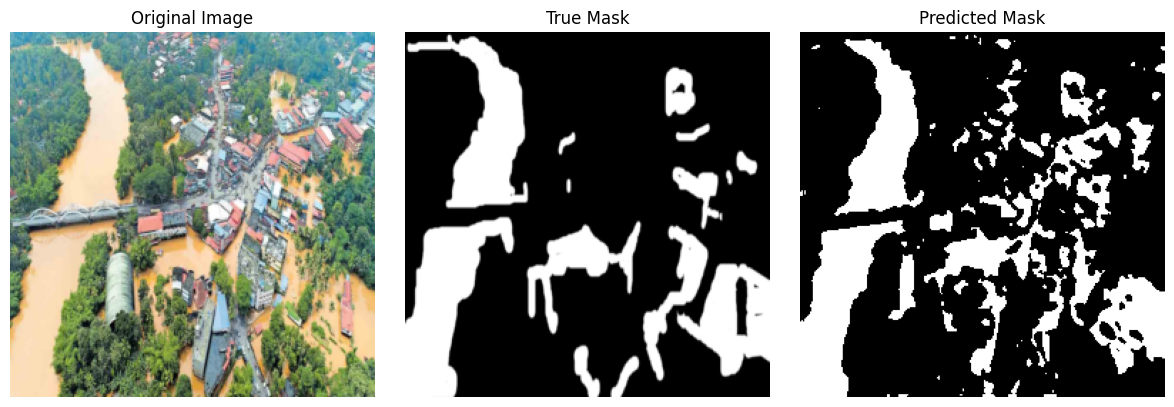

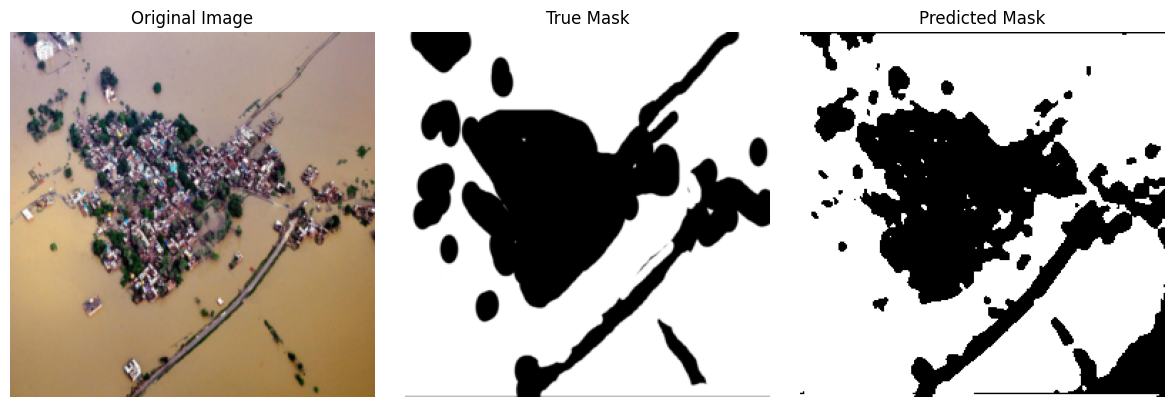

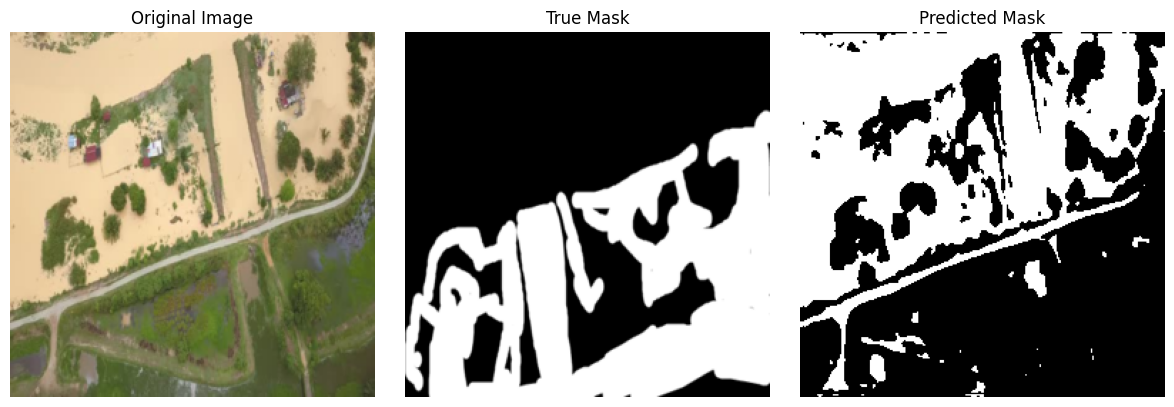

In [18]:
#Visualize predictions

import matplotlib.pyplot as plt

def visualize_predictions(loader, model, num_samples=3):
    model.eval()
    samples_shown = 0

    with torch.no_grad():
        for images, masks in loader:
            images = images.to(device)
            outputs = torch.sigmoid(model(images)) > 0.5

            for img, pred, mask in zip(images, outputs, masks):
                if samples_shown >= num_samples:
                    return

                img = img.cpu().squeeze().permute(1, 2, 0).numpy()
                pred = pred.cpu().squeeze().numpy()
                mask = mask.cpu().squeeze().numpy()

                fig, axes = plt.subplots(1, 3, figsize=(12, 4))
                axes[0].imshow(img)
                axes[0].set_title("Original Image")
                axes[1].imshow(mask, cmap='gray')
                axes[1].set_title("True Mask")
                axes[2].imshow(pred, cmap='gray')
                axes[2].set_title("Predicted Mask")
                for ax in axes:
                    ax.axis("off")
                plt.tight_layout()
                plt.show()

                samples_shown += 1

# Call the function
visualize_predictions(val_loader, model)


In [22]:
torch.save(model.state_dict(), "segmentation_model.pth")
print("Model saved.")

Model saved.
